# IMPORT 

#### required packages: pandas, numpy, matplotlib.pyplot

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### run required notebook: Functions.ipynb

In [12]:
%run FunctionsRealData.ipynb

# STORING DATA

#### Creating df for barcodes file, and plate file --- 1.5 s

In [4]:
mainDF, f, r = creatingMasterFrame('Barcode_keyfile.txt') #creates df of given REDI barcodes
df = creatingAllBCdf('Sample_keyfile_july10_Reet.txt') #creates df of given Plate file
mainDF1 = mainDFandAllBC(df,mainDF) #combines mainDF and df to create a dataframe with all the REDI and Plate BC 
df['plate_seq'] = df['FWD PLATE BC']+df['REV PLATE BC'] #combines FWD PLATE BC seq with REV PLATE BC

In [5]:
seqsdf = pd.read_csv('seqsdf.csv').drop("Unnamed: 0",1) #stores all the sequences from a csv file (fastq file converted to csv through the passfastadf() function) into a dataframe ---- 11 seconds
seqsdf10000 = seqsdf[:10000] #gets 10000 subsample from big dataframe


#### Plot histogram of read lengths

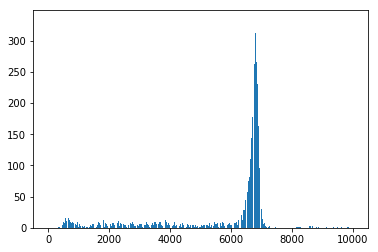

In [7]:

#l, m = maxLineLen(seqsdf10000,'seqs') #plot for 10,000 subset data
l, m = maxLineLen(seqsdf,'seqs') #plot for all data
h = createHist(l, 0,10000) #creates Histogram
plottingHistogram(h) #plots histogram

#### Eliminating all reads that have sequences <= 6000

In [8]:
#seqsdf10000['length'] = l
seqsdf['length'] = l
#seqsdf5827 = seqsdf10000[seqsdf10000['length'] > 6000]
seqsdf5827 = seqsdf[seqsdf['length'] > 6000]
len(seqsdf5827)

90424

#### Getting list of the first 100 base pairs of each read sequence

In [9]:

seqsdf5827_100_list = gettingLenReads(seqsdf5827['seqs'].tolist(),0,100, 'forward')
seqsdf5827['first 100'] = seqsdf5827_100_list

/Users/reetmishra/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Appending all sequences (with entire length) into a list and appending all sequences (with 100 length) into a list

In [11]:
#creating allseqs --> 0.63 seconds
allseqs = []
for i in seqsdf5827['seqs']:
    allseqs.append(i)
    
#creating allseqs_first100 ---> 0.63 seconds
allseqs_first100 = []
for i in seqsdf5827['first 100']:
    allseqs_first100.append(i)

#### UNUSED: Creates Constant Sequence for FWD BC

In [16]:

#FWD_CONSTANT aligning FWD PLATE BC #took 1:10 minutes
constantSequence = 'taactccggaa'.upper()
readIDS = list(range(len(allseqs_first100)))
FWD_constant, FWD_constant_FASTA = determiningAlignment(constantSequence,allseqs_first100,0,90424,650,'after', False, 10, 'First', readIDS)
FWD_constant = FWD_constant[FWD_constant['sequences']!= 'NNNNNNNNNNNN']
#FWD_constant_FASTA
######FWD_constant_FASTA = FWD_constant[['read_id','reads']]
writingTxtForCSB(FWD_constant_FASTA,'FWD_constant_FASTA_Real.csv','FWD_constant_FASTA_Real.txt')
#storing FWD_constant
FWD_constant.to_csv('FWD_constant_FWDPLATEBC_TAACTCCGGAA_650_10_Real.csv')
#FWD_constant


In [17]:
FWD_constant = pd.read_csv('FWD_constant_FWDPLATEBC_TAACTCCGGAA_650_10_Real.csv').drop('Unnamed: 0',1)
FWD_constant 

# FWD BC ALIGNMENT - Forward Orientation

#### STEP 1

In [18]:
#convert FWD_constant_FASTA_Real.txt file into FASTA File through http://sequenceconversion.bugaco.com

#### STEP 2 - GET CORRECT ALIGNMENT

In [20]:
##Conduct alignment in Command Line (after installing bowtie2 on computer)

###Creating Bowtie2 index
#mkdir FWD_constant_FASTA_Real_F
#mv FWD_constant_FASTA_Real_F.fasta FWD_constant_FASTA_Real_F
#bowtie2-build FWD_constant_FASTA_Real_F/FWD_constant_FASTA_Real_F.fasta FWD_constant_FASTA_Real_F/FWD_constant_FASTA_Real_F

###Getting all alignments from Bowtie2 
#mkdir FWD_constant_FASTA_Real_F_Results
#bowtie2 --score-min L,-12,-12 --all -x FWD_constant_FASTA_Real_F/FWD_constant_FASTA_Real_F forward.fastq > FWD_constant_FASTA_Real_F_Results/FWD_constant_FASTA_Real_F_Results.sam

#RESULTS: 
#4 reads; of these:
#  4 (100.00%) were unpaired; of these:
#    0 (0.00%) aligned 0 times
#    0 (0.00%) aligned exactly 1 time
#    4 (100.00%) aligned >1 times
#100.00% overall alignment rate

###Convert results sam file to bam file, and then bed file
#samtools view -Sb FWD_constant_FASTA_Real_F_Results/FWD_constant_FASTA_Real_F_Results.sam > FWD_constant_FASTA_Real_F_Results/FWD_constant_FASTA_Real_F_Results.bam
#bedtools bamtobed -cigar -i FWD_constant_FASTA_Real_F_Results.bam > FWD_constant_FASTA_Real_F_Results.bed


#### STEP 3

In [24]:
#store resulting alignment files into dataframe; drop duplicate reads

#1:20 minutes
#l,m = maxLineLen(FWD_constant,'reads') #checking if reads are all 100
df2473_new = pd.read_csv('FWD_constant_FWDPLATEBC_TAACTCCGGAA_650_10_Real.csv').drop('Unnamed: 0',1)
fbcsamdf2473_new = sam2DFWithBED('FWD_constant_FASTA_Real_2/FWD_constant_FASTA_Real_2.sam', 'FWD_constant_FASTA_Real_2/FWD_constant_FASTA_Real_2.bed', 'bowtie', 'FWD_REAL')
fbcsamdf2473_new = removeStarredReads(fbcsamdf2473_new)
#fbcsamdf2473_new #21806 #6938
dropfbcsamdf2473_new = fbcsamdf2473_new.drop_duplicates('read_id',keep = 'first') #right now this is dropping all duplicates, I need to make it so it only drops duplicates but keeps at least one of each gene_header
dropfbcsamdf2473_new #2473, #5796

,headers,read_id,startpos,seq,alignment_score,numMismatches,MDTag,strand,AS
0,0,48725,37,TGCTAA,AS:i:0,NM:i:0,MD:Z:6,+,0
172528,1,36345,32,AGGTCA,AS:i:0,NM:i:0,MD:Z:6,+,0
172508,1,31667,40,AGGTCA,AS:i:0,NM:i:0,MD:Z:6,+,0
172509,1,72388,32,AGGTCA,AS:i:0,NM:i:0,MD:Z:6,+,0
172510,1,55165,38,AGGTCA,AS:i:0,NM:i:0,MD:Z:6,+,0
172511,1,42420,45,AGGTCA,AS:i:0,NM:i:0,MD:Z:6,+,0
172512,1,23884,40,AGGTCA,AS:i:0,NM:i:0,MD:Z:6,+,0
172513,1,57090,37,AGGTCA,AS:i:0,NM:i:0,MD:Z:6,+,0
172514,1,25325,39,AGGTCA,AS:i:0,NM:i:0,MD:Z:6,+,0
172515,1,87480,37,AGGTCA,AS:i:0,NM:i:0,MD:Z:6,+,0


# REV BC ALIGNMENT - Forward Orientation

#### STEP 1 - STORING DATA

In [25]:
#Getting list of the last 100 base pairs of each read sequence
seqsdf5827_last_100_list = gettingLenReads(seqsdf5827['seqs'].tolist(),-100,0,'reverse')
seqsdf5827['last 100'] = seqsdf5827_last_100_list

/Users/reetmishra/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
#Appending all the last 100 column dataframe to a list
#creating allseqs_last100 ---> 0.63 seconds
allseqs_last100 = []
for i in seqsdf5827['last 100']:
    allseqs_last100.append(i)

#### STEP 2 - Getting FWD already aligned barcodes

In [22]:
##1 second
#FWD, Entire_Seqs, FWD_Seqs = gettingMatchedSeqs(dropfbcsamdf2473_new, 'read_id', seqsdf5827, 'seqs', 'headers', 'FWD_BC_header', 'last 100', 'Last100')
#FWD.to_csv('FWD_totalReads_new.csv', index = False, header = True)

In [ ]:
len(FWD['read_id'].tolist())

In [ ]:
readIDs = FWD['read_id'].tolist()
#len(readIDs)
len(FWD_Seqs)

In [33]:
#REV_constant align REV PLATE BC to get constant sequences
constantSequence = 'GATCGGAAGAG'.upper()
readIDs = FWD['read_id'].tolist()
REV_constant, REV_constant_FASTA = determiningAlignment(constantSequence,FWD_Seqs,0,90085,650,'after', False, 10, 'Second', readIDs)
#REV_constant
REV_constant = REV_constant[REV_constant['sequences']!= 'NNNNNNNNNNNN']
### OH I GET IT, so I didn't get rid of the reads with 'NNNNNNNNNN' in REV_constant_FASTA because those reads just take the whole read
#REV_constant
###########REV_constant_FASTA = REV_constant[['read_id','reads']]
writingTxtForCSB(REV_constant_FASTA,'REV_constant_FASTA_Real.csv','REV_constant_FASTA_Real.txt')
#storing FWD_constant
REV_constant.to_csv('REV_constant_REVPLATEBC_GATCGGAAGAG_650_10_Real.csv')


#### STEP 3 - Alignment

In [2]:
#convert REV_constant_FASTA_Real.txt file into FASTA File through http://sequenceconversion.bugaco.com

In [3]:
##Conduct alignment in Command Line (after installing bowtie2 on computer)

###Creating Bowtie2 index
#mkdir REV_constant_FASTA_Real_F
#mv REV_constant_FASTA_Real_F.fasta FWD_constant_FASTA_Real_F
#bowtie2-build REV_constant_FASTA_Real_F/REV_constant_FASTA_Real_F.fasta REV_constant_FASTA_Real_F/REV_constant_FASTA_Real_F

###Getting all alignments from Bowtie2 
#mkdir FWD_constant_FASTA_Real_F_Results
#bowtie2 --score-min L,-12,-12 --all -x REV_constant_FASTA_Real_F/REV_constant_FASTA_Real_F reverse.fastq > REV_constant_FASTA_Real_F_Results/REV_constant_FASTA_Real_F_Results.sam

#RESULTS: 
#4 reads; of these:
#  4 (100.00%) were unpaired; of these:
#    0 (0.00%) aligned 0 times
#    0 (0.00%) aligned exactly 1 time
#    4 (100.00%) aligned >1 times
#100.00% overall alignment rate

###Convert results sam file to bam file, and then bed file
#samtools view -Sb REV_constant_FASTA_Real_2/REV_constant_FASTA_Real_2.sam > REV_constant_FASTA_Real_2/REV_constant_FASTA_Real_2.bam
#bedtools bamtobed -cigar -i REV_constant_FASTA_Real_2.bam > REV_constant_FASTA_Real_2.bed


#### STEP 4

In [30]:
#store resulting alignment files into dataframe; drop duplicate reads

#1:20 minutes
#l,m = maxLineLen(FWD_constant,'reads') #checking if reads are all 100
#after alignment
dr1820_new = pd.read_csv('REV_constant_REVPLATEBC_GATCGGAAGAG_650_10_Real.csv').drop('Unnamed: 0',1)
#dr1820_new
rbcsamdf1820_new = sam2DFWithBED('REV_constant_FASTA_Real_2/REV_constant_FASTA_Real_2.sam', 'REV_constant_FASTA_Real_2/REV_constant_FASTA_Real_2.bed', 'bowtie', 'REV_Real')
rbcsamdf1820_new = removeStarredReads(rbcsamdf1820_new)
#rbcsamdf1820_new
droprbcsamdf5611_new = rbcsamdf1820_new.drop_duplicates('read_id',keep = 'first') #right now this is dropping all duplicates, I need to make it so it only drops duplicates but keeps at least one of each gene_header
droprbcsamdf5611_new #5611

,headers,read_id,startpos,seq,alignment_score,numMismatches,MDTag,strand,AS
0,0,6918,72,ATCATA,AS:i:0,NM:i:0,MD:Z:6,-,0
253939,2,68481,19,CTGAAA,AS:i:0,NM:i:0,MD:Z:6,-,0
253937,2,84855,24,CTGAAA,AS:i:0,NM:i:0,MD:Z:6,-,0
253936,2,32067,51,CTGAAA,AS:i:0,NM:i:0,MD:Z:6,-,0
253935,2,24754,49,TTTCAG,AS:i:0,NM:i:0,MD:Z:6,+,0
253934,2,555,2,CTGAAA,AS:i:0,NM:i:0,MD:Z:6,-,0
253933,2,22582,85,CTGAAA,AS:i:0,NM:i:0,MD:Z:6,-,0
253932,2,5778,21,CTGAAA,AS:i:0,NM:i:0,MD:Z:6,-,0
253931,2,64768,17,CTGAAA,AS:i:0,NM:i:0,MD:Z:6,-,0
253930,2,81869,92,CTGAAA,AS:i:0,NM:i:0,MD:Z:6,-,0


# PLATE BC DATAFRAME

In [31]:
#Combining FWD and REV results into one dataframe

#1 second, FWD and REV together
FWD_REV = pd.merge(dropfbcsamdf2473_new, droprbcsamdf5611_new, how = 'inner', on = ['read_id'])
count = 0
names = []
for i in FWD_REV.columns:
    if i[-1] == 'x':
        i = i[:-1]
        i = i+'FWD'
    elif i[-1] == 'y':
        i = i[:-1]
        i = i+'REV'
    names.append(i)
    count = count + 1
FWD_REV.columns = names
FWD_REV['seq_FWD_real'] = gettingReverseComplements(FWD_REV['seq_FWD'].tolist(),FWD_REV['strand_FWD'].tolist())
FWD_REV['seq_REV_real'] = gettingReverseComplements(FWD_REV['seq_REV'].tolist(),FWD_REV['strand_REV'].tolist())
FWD_REV['plate_seq'] = FWD_REV['seq_FWD_real']+FWD_REV['seq_REV_real']
FWD_REV = FWD_REV.drop(['seq_FWD_real','seq_REV_real'],1)
FWD_REV = pd.merge(FWD_REV,df,how='left',on=['plate_seq'])
FWD_REV = FWD_REV.drop(['FWD PLATE BC','REV PLATE BC'],1)
#count = 0
#entireRead = []
#for i in FWD_REV['reads']:
#    entireRead.append(allseqs[i])
#    count = count +1
#FWD_REV['entireRead'] = entireRead
#FWD_REV.to_csv('FWD_REV.csv', header = True)
#FWD_REV

# REDI BC ALIGNMENT - Forward Orientation ----- START FROM HERE

#### Step 1: Storing Data

In [48]:
#Getting list of the last 400 base pairs of each read sequence
seqsdf5827_last_400_list = gettingLenReads(seqsdf5827['seqs'].tolist(),-400,0,'redi')
seqsdf5827['last 400'] = seqsdf5827_last_400_list

/Users/reetmishra/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [85]:
#l,m  = maxLineLen(seqsdf5827,'last 400') #to check if all 400 length

In [49]:
#creating allseqs_last400 ---> 0.63 seconds
allseqs_last400 = []
for i in seqsdf5827['last 400']:
    allseqs_last400.append(i)

#### STEP 2 - Getting REV already aligned barcodes

In [39]:
#1 second
REV, REV_Entire_Seqs, REV_Seqs = gettingMatchedSeqs(droprbcsamdf5611_new, 'read_id', seqsdf5827, 'seqs', 'headers', 'REV_BC_header', 'last 400', 'Last400')
REV.to_csv('REV_totalReads_new.csv', index = False, header = True)

In [40]:
#REDI_constant align REDI PLATE BC to get constant sequences
#took 2 minutes
constantSequence = 'GGTACCGATAT'.upper()
readIDs = REV['read_id'].tolist()
#len(readIDs)
REDI_constant, REDI_constant_FASTA = determiningAlignment(constantSequence,REV_Seqs,0,87371,650,'after', False, 30, 'Third', readIDs)
#REDI_constant
REDI_constant = REDI_constant[REDI_constant['sequences']!= 'NNNNNNNNNNNN'] #2366
#REDI_constant
writingTxtForCSB(REDI_constant_FASTA,'REDI_constant_FASTA_Real.csv','REDI_constant_FASTA_Real.txt')
#storing FWD_constant
REDI_constant.to_csv('REDI_constant_REVPLATEBC_GGTACCGATAT_650_30_Real.csv')


#### Step 3: Alignment

In [1]:
#convert REV_constant_FASTA_Real.txt file into FASTA File through http://sequenceconversion.bugaco.com

In [ ]:
##Conduct alignment in Command Line (after installing bowtie2 on computer)

###Creating Bowtie2 index
#mkdir REDI_PLATE_BC_Real
#mv REDI_PLATE_BC_Real.fasta REDI_PLATE_BC_Real
#bowtie2-build REDI_PLATE_BC_Real/REDI_PLATE_BC_Real.fasta REDI_PLATE_BC_Real/REDI_PLATE_BC_Real

###Getting all alignments from Bowtie2 
#mkdir FWD_constant_FASTA_Real_F_Results
#bowtie2 --score-min L,-12,-12 --all -x REDI_PLATE_BC_Real/REDI_PLATE_BC_Real f2.fastq > REDI_constant_FASTA_Real_3/REDI_constant_FASTA_Real_3.sam

#RESULTS: 
#4 reads; of these:
#  4 (100.00%) were unpaired; of these:
#    0 (0.00%) aligned 0 times
#    0 (0.00%) aligned exactly 1 time
#    4 (100.00%) aligned >1 times
#100.00% overall alignment rate

###Convert results sam file to bam file, and then bed file
#samtools view -Sb REDI_constant_FASTA_Real_3/REDI_constant_FASTA_Real_3.sam > REDI_constant_FASTA_Real_3/REDI_constant_FASTA_Real_3.bam
#bedtools bamtobed -cigar -i REDI_constant_FASTA_Real_3.bam > REDI_constant_FASTA_Real_3.bed


#### Step 4: Analyzing Alignment

In [10]:
#store resulting alignment files into dataframe; drop duplicate reads

#1:20 minutes
#l,m = maxLineLen(FWD_constant,'reads') #checking if reads are all 100
#after alignment
dredi2366_new = pd.read_csv('REDI_constant_REVPLATEBC_GGTACCGATAT_650_30_Real.csv').drop('Unnamed: 0',1)
#dredi2366_new
#redibcsamdf5611_new = sam2DFWithBED('REDI_constant_FASTA_A3/REDI_constant_FASTA_A3.sam', 'REDI_constant_FASTA_A3/REDI_constant_FASTA_A3.bed', 'bowtie')
#redibcsamdf2439_new = sam2DFWithBED('REDI_constant_FASTA_A8/REDI_constant_FASTA_A8.sam', 'REDI_constant_FASTA_A8/REDI_constant_FASTA_A8.bed', 'bowtie')
#redibcsamdf2167_new = sam2DFWithBED('REDI_constant_FASTA_A7/REDI_constant_FASTA_A7.sam', 'REDI_constant_FASTA_A7/REDI_constant_FASTA_A7.bed', 'bowtie')
#redibcsamdf2167_new = sam2DFWithBED('REDI_constant_FASTA_Real_1/REDI_constant_FASTA_Real_1.sam', 'REDI_constant_FASTA_Real_1/REDI_constant_FASTA_Real_1.bed', 'bowtie')
###########################################3333333#################################################################3333
redibcsamdf50000_new = sam2DFWithBED('REDI_constant_FASTA_Real_3/REDI_constant_FASTA_Real_3.sam', 'REDI_constant_FASTA_Real_3/REDI_constant_FASTA_Real_3.bed', 'bowtie')
redibcsamdf50000_new.to_csv('redibcsamdf50000_new.csv', header = True)
#redibcsamdf50000_new = pd.read_csv('redibcsamdf50000_new.csv')
#redibcsamdf2366_small = sam2DFWithBED('REDI_constant_FASTA_A7/REDI_constant_FASTA_A7.sam', 'REDI_constant_FASTA_A7/REDI_constant_FASTA_A7.bed', 'bowtie')
#redibcsamdf5611_new = removeStarredReads(redibcsamdf5611_new)
#redibcsamdf2439_new = removeStarredReads(redibcsamdf2439_new)
#redibcsamdf2167_new = removeStarredReads(redibcsamdf2167_new)
#print redibcsamdf2167_new['read_id']
#redibcsamdf2366_small
#dropredibcsamdf5611_new = redibcsamdf5611_new.drop_duplicates('read_id',keep = 'first')
#dropredibcsamdf2439_new = redibcsamdf2439_new.drop_duplicates('read_id',keep = 'first')
#dropredibcsamdf2167_new = redibcsamdf2167_new.drop_duplicates('read_id',keep = 'first')
#dropredibcsamdf2167_new
#dropredibcsamdf2366_small = redibcsamdf2366_small.drop_duplicates('read_id',keep = 'first') #right now this is dropping all duplicates, I need to make it so it only drops duplicates but keeps at least one of each gene_header
#dropredibcsamdf2366_small #2439 #even at -24 i'm stil getting the right one so try increasing
dropredibcsamdf50000_new = pd.read_csv('dropredibcsamdf50000_new.csv').drop('Unnamed: 0',1)


In [4]:
#dropredibcsamdf50000_new

# EXTRA TESTING----------------------------------------------------------------------

In [76]:
#adding read_id to REDI BC dataframe
count =0
for i in dropredibcsamdf50000_new['read_id']:
    if(int(i) > 10000):
        print dropredibcsamdf50000_new.iloc[count]
    count = count +1

In [5]:
#FWD_REV_REDI_2167.iloc[65705]

In [72]:
FWD_REV_REDI_2167.iloc[99][25]

'TTGGTACTTCGGGTTCAGTTACGTATTGCTAGGTCAAGGTCAAGGTCAGGTCCTTAACTCCGGAATCATTCCTCCCAACGTCAGCCTAACCCTTTCATGAAGCCATAAAATGGGACAGGCCACCGTATGCAGGTGCCTCTCGAGCCAACACCATGTCATTGCATCTTCCAGCGGTAAGTCCCTTGTTTCGATCAACAGCTTCGGCATGAGGCTCGAATGGACACTGCGTTGGTCTCCTCAGCCTTCACTACCAAGCCAGTTTCGCTTGGCTGAGCGCGCCTGTTCTCTTGCTCGCCGATTGGATTATCTCCGCGATGCAACTACTGCAGTCTTGATTCTCTCAGCGAGCTCATCCAGAACGGATCTCTCAGATGCAGCATCCTCACTCTCTGCGGGCGACGTGGCCGCCAGATGACATGGCGAAGTTTTGCTGTGTCGCCAGCGACATGACTAAAATCAGGTTTCGCAACCCTCTGTCTGAGCCGTCCAGCTGTCGGTTTGCTTATTTTCCGTAGGGTCCCCAACATATGCACATGGGTCGTCAGCTGTACAAAGATTTACGGCGTTTCCGCGAAATCATTTGGACAGGGTGTACAGCCAGGTGGTCAGCCCGGTCTCGTGGAGAAGTGGGCATGTTCAAAGAGACATCGGCGCCGCATCCTCGCCGTACCTGGCGTCTGGCCTATTGATATCATTCTCCCGCGATCGCTGGATTCAGATCGCATTGTTAATCTCCTCGCCAGCGTCGGGTACGGCCTATTGATTTTGTCTTCGGCCATTTCCGCCGGAGACTACGATGTACGCGTCAATTACTGCCTCAGGCTATGGCTCTAGACTCGCGATCAGCACGAGACAAGTCCTGGCCCTCACTGCCAAAGCGCCGGCGGCACCGCGACCGCCTTGTCCTGCGGGCCTGAAGTATGAAGCCTCTACTCGACGGGTGAGGCGACGCGTGACGCAGAGCATCCTCAATCGCATGTCTGCAACAGCGCGGAGGCC

In [6]:
#dropredibcsamdf2167_new[['read_id','headers']].groupby('read_id').count().unstack().plot.bar()

In [7]:
#count =0;
#for i in dropredibcsamdf2167_new['read_id']:
#    if i =='4373':
#        print 'yex'
        

In [254]:
dropredibcsamdf2366_new.to_csv('dropredibcsamdf2366_100%_new_2439.csv', header = True)

In [66]:
dropredibcsamdf2167_new.to_csv('Real_REDI_5611.csv',header = True)

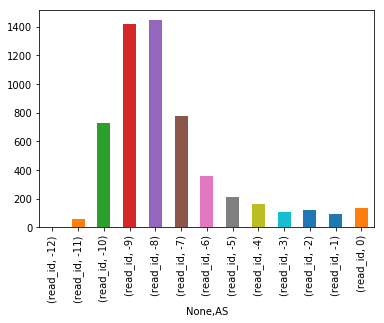

In [61]:
dropredibcsamdf2167_new[['AS', 'read_id']].groupby('AS').count().unstack().plot.bar()

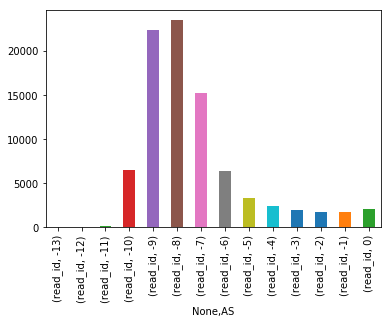

In [33]:
dropredibcsamdf50000_new[['AS', 'read_id']].groupby('AS').count().unstack().plot.bar()

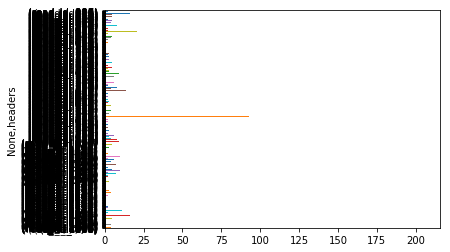

In [67]:
dropredibcsamdf2167_new[['headers', 'read_id']].groupby('headers').count().unstack().plot.barh()

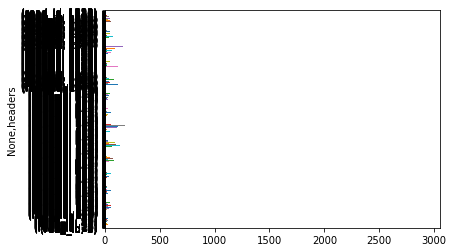

In [34]:
dropredibcsamdf50000_new[['headers', 'read_id']].groupby('headers').count().unstack().plot.barh()

In [44]:
#x = redibcsamdf2167_new[['headers', 'read_id']].groupby('headers').count()
#max_a = max(x['read_id'])
#z = x['read_id'].tolist()
#x.iloc[z.index(max(z))]

In [40]:
lastthree = len(dropredibcsamdf50000_new[dropredibcsamdf50000_new['AS']==-13]) + len(dropredibcsamdf50000_new[dropredibcsamdf50000_new['AS']==-12]) + len(dropredibcsamdf50000_new[dropredibcsamdf50000_new['AS']==-11])
final = lastthree + len(dropredibcsamdf50000_new[dropredibcsamdf50000_new['AS']==-9]) + len(dropredibcsamdf50000_new[dropredibcsamdf50000_new['AS']==-8]) + len(dropredibcsamdf50000_new[dropredibcsamdf50000_new['AS']==-7])
len(dropredibcsamdf50000_new[dropredibcsamdf50000_new['AS']==-7])



15208

In [ ]:
len(dropredibcsamdf2167_new[dropredibcsamdf2167_new['AS']==-16]) + len(dropredibcsamdf2167_new[dropredibcsamdf2167_new['AS']==-15]) + len(dropredibcsamdf2167_new[dropredibcsamdf2167_new['AS']==-14])

In [56]:
dropredibcsamdf50000_new[dropredibcsamdf50000_new['AS']==-6]

,headers,read_id,startpos,seq,alignment_score,numMismatches,MDTag,strand,AS
13279,150,71197,281,ATAAGAAGGCAGAAGACTTTTGTGGT,AS:i:-6,NM:i:6,MD:Z:8A2A2T2A2A0C4,+,-6
13280,150,87074,294,ATAAGAAGGCAGAAGACTTTTGTGGT,AS:i:-6,NM:i:6,MD:Z:1C0T1A0G1A0A17,+,-6
13281,150,45416,166,ATAAGAAGGCAGAAGACTTTTGTGGT,AS:i:-6,NM:i:6,MD:Z:3T1G1T0T3G2G10,+,-6
13282,520,84339,76,AAAAGAAAAAAGAACACTATTATTAC,AS:i:-6,NM:i:6,MD:Z:5C4C0A3T0T7G1,+,-6
13283,150,74688,314,ATAAGAAGGCAGAAGACTTTTGTGGT,AS:i:-6,NM:i:6,MD:Z:0T0A1G0A1G1C17,+,-6
13284,186,77856,170,TTCTAAATACAGTTGTGCATTAATGT,AS:i:-6,NM:i:6,MD:Z:1A5A3C0A4A6A1,-,-6
13285,1200,90399,338,TTCCTAACCGAAAAATTTATTCTACG,AS:i:-6,NM:i:6,MD:Z:2T1C0T1A1A15A0,+,-6
13286,617,17179,273,AACCTAATAGCAAAAAACATTTAAGA,AS:i:-6,NM:i:6,MD:Z:9A6C0A0T2A0G3,+,-6
13287,870,64792,72,AAAAAAATTTTAAATAAGCTTAGATT,AS:i:-6,NM:i:6,MD:Z:7C2A3C2A3G0T3,+,-6
13288,617,880,264,AACCTAATAGCAAAAAACATTTAAGA,AS:i:-6,NM:i:6,MD:Z:19C0C0C1T0T0T0,+,-6


In [57]:
allseqs_last400[5270]

'GCTGCTACTCATCCTAGTCCTGTGCCAAGCTATTTAATATCAAAAGCAAACAAACTTGTGTGCTTCGTGGATGTTATTCATTATTACCACCAAAGGAATTACTGGAGTTAGTTGAAGCATTAGGTCCAAAATTTGTTTACCTAAAAAACACATGTGGATGTATGTTAATATATGGACTAAAGGCTTTTGTCGACGGATCCGATATCAGTACCGCCTATAAGCAGAGTAATGTTGCAGCTTGCTTCCATTATAATGCATGCTATACGAAGTTATCCATGAAAAAAAATAATGTAGTTACTTCGGTACCGATATCAGATCTAAGATCATGGAAGAGCGGTTCAGCAGGAATACCGAGACCGATCTCATTATGCAAATCTTCTGTGACGTATTAACTACCACC'

In [58]:
mainDF.iloc[455]

0
ID                                BC_0456
BC.Read.1      TATTAAACAATAAAAATAATTTAGTT
BC.Read.2      AACTAAATTATTTTTATTGTTTAATA
Plate [384]                          v4.4
Well [384]                            E12
Row [1536]                             10
Col [1536]                             24
Pos [1536]                            456
posSeq                              11830
Name: 456, dtype: object

In [59]:
allseqs[5270]

'TTGGTACTTCGCGTTCCGGTTACGTATTGCTGGATTAGGATTAGGATTGGGATTATAACTCCGGAATCATTCCTCCCAACGCGTCAGCTAACCCGCCTAAACCCATGCATAAAATGGGACGAATACCGTATGCGGAACACTCGAGCCAACACCGCTGTCGTGCCGCTCTCCAGCAGTGAAGTCCTTGTTCTGATCAGCAGCTTCGGCATAGGGCTCGAATGGACTGCTGCGTTAATGGAATCTCCTCCATTTACTACCCAAGCCGGTTTTCGCTGCTGAGGGCGCCTGTTCTCTTGCTTTCGCCGGTGGATTATCTCCGCGTGCAATACGCAGTCTCCGATTCTCTCAGCGAGAGCTCGTCCAGGAACGGATCTCAGATACCCAACATCTCCACTCTCTACGGGCGACGTAGCCGCCAGATGACATGGCGAAGTTTTGCTGTTGTCGCCCAGCGACATATGACCTAAAATCAGGTTTCGCAACCCACTCTGACGCCGCAGGCCCGTCAGCCTGTCCGGTTTTGTATTTTCGGCCGGGTCTAACATATGCACATGGTCGTCAGCTGTACAAAATTCCCGGCATTCACCCGAAAGCGTCGACTTTGGACAGGGTGTACAGCCAGGTGGTCAATATTCTCGTGGAGAAAGTGGGCATGTTCAAGACATCGGCGCCGCATCCTCCTCCATGCCTGACGTCTGGCCCTGTGATATCATTCTCCCGCAGTCGCCATGGTTCAGATCCGCATTGTTCGACTCTCCTCGCCAGCGTCGAATTACGGCCTGATTTTGTCTTGGGCCATTCCGCCGGAGACTACGATGTTGTGCGTCCGGTGCGCCTCAGGCTATGGCTCTGGAGCTCGCGATCCGCGCGAGTTAAGTCTGGCCCTCACTGAAAGCGCCAGCGGCTCGCGGCCGCCTGCTTGTCCTGCGGGCCTGGAAGTGTAGAAGCCTCTACTCGACGAGGTGAAGGCGACGCGTGAGCGCAGGCATCCTCGAAATC

In [60]:
count = 0
for i in FWD_REV['read_id']:
    if i == '5270':
        print count
        print FWD_REV.iloc[count]
    count = count +1

25609
headers_FWD                       2
read_id                        5270
startpos_FWD                     32
seq_FWD                      GGATTA
alignment_score_FWD          AS:i:0
numMismatches_FWD            NM:i:0
MDTag_FWD                    MD:Z:6
strand_FWD                        +
AS_FWD                            0
headers_REV                       2
startpos_REV                     37
seq_REV                      TTTCAG
alignment_score_REV         AS:i:-6
numMismatches_REV            NM:i:1
MDTag_REV                  MD:Z:0G5
strand_REV                        +
AS_REV                           -6
plate_seq              GGATTATTTCAG
Plate                   Alanine -11
Name: 25609, dtype: object


In [63]:
type(dropredibcsamdf50000_new['read_id'][0])

numpy.int64

In [65]:
type(FWD_REV['read_id'][0])

str

# ------------------------------------------------------------END of EXTRA TESTING

In [66]:
#converting all read_ids in FWD_REV from strings to ints
readIDS =[]
for i in FWD_REV['read_id']:
    x = int(i)
    readIDS.append(x)
FWD_REV['read_id']=readIDS

## Merging FWD, REV, and REDI BC

In [67]:
#FWD_REV_REDI_5611 = pd.merge(FWD_REV, dropredibcsamdf5611_new, how = 'inner', on = ['read_id'])
#FWD_REV_REDI_2439 = pd.merge(FWD_REV, dropredibcsamdf2439_new, how = 'inner', on = ['read_id'])
#FWD_REV_REDI_2167 = pd.merge(FWD_REV, dropredibcsamdf2167_new, how = 'inner', on = ['read_id'])
FWD_REV_REDI_87371 = pd.merge(FWD_REV, dropredibcsamdf50000_new, how = 'inner', on = ['read_id'])
#FWD_REV_REDI_5611 = FWD_REV_REDI_5611.drop(['numMismatches','MDTag', 'strand'],1)
#FWD_REV_REDI_2439 = FWD_REV_REDI_2439.drop(['numMismatches','MDTag', 'strand'],1)
#FWD_REV_REDI_2167 = FWD_REV_REDI_2167.drop(['numMismatches','MDTag', 'strand'],1)
FWD_REV_REDI_87371 = FWD_REV_REDI_87371.drop(['numMismatches','MDTag', 'strand'],1)


#FWD_REV_REDI_5611.columns.values[19:24] = ['headers_REDI', 'startpos_REDI', 'seq_REDI', 'alignment_score_REDI', 'AS_REDI']
#FWD_REV_REDI_2439.columns.values[19:24] = ['headers_REDI', 'startpos_REDI', 'seq_REDI', 'alignment_score_REDI', 'AS_REDI']
#FWD_REV_REDI_2167.columns.values[19:24] = ['headers_REDI', 'startpos_REDI', 'seq_REDI', 'alignment_score_REDI', 'AS_REDI']
FWD_REV_REDI_87371.columns.values[19:24] = ['headers_REDI', 'startpos_REDI', 'seq_REDI', 'alignment_score_REDI', 'AS_REDI']


#FWD_REV_REDI_5611['barcodeNum_REDI'] = FWD_REV_REDI_5611['headers_REDI'].astype(int)+1
#FWD_REV_REDI_2439['barcodeNum_REDI'] = FWD_REV_REDI_2439['headers_REDI'].astype(int)+1
#FWD_REV_REDI_2167['barcodeNum_REDI'] = FWD_REV_REDI_2167['headers_REDI'].astype(int)+1
FWD_REV_REDI_87371['barcodeNum_REDI'] = FWD_REV_REDI_87371['headers_REDI'].astype(int)+1
#FWD_REV_REDI.to_csv('FWD_REV_REDI.csv')

#count = 0
#entireRead = []
#for i in FWD_REV_REDI_5611['read_id']:
#    entireRead.append(allseqs[int(i)])
#    count = count +1
#FWD_REV_REDI_5611['entireRead'] = entireRead
#count = 0
#entireRead = []
#for i in FWD_REV_REDI_2439['read_id']:
#    entireRead.append(allseqs[int(i)])
#    count = count +1
#FWD_REV_REDI_2439['entireRead'] = entireRead
#count = 0
#entireRead = []
#for i in FWD_REV_REDI_2167['read_id']:
#    entireRead.append(allseqs[int(i)])
#    count = count +1
#FWD_REV_REDI_2167['entireRead'] = entireRead
count = 0
entireRead = []
for i in FWD_REV_REDI_87371['read_id']:
    entireRead.append(allseqs[int(i)])
    count = count +1
FWD_REV_REDI_87371['entireRead'] = entireRead

#FWD_REV_REDI_5611.to_csv('FWD_REV_REDI_5611.csv', header = True)
#FWD_REV_REDI_2439.to_csv('FWD_REV_REDI_2439.csv', header = True)
#FWD_REV_REDI_2167.to_csv('FWD_REV_REDI_2167.csv', header = True)
#FWD_REV_REDI_2167.to_csv('FWD_REV_REDI_2167_Real.csv', header = True)
FWD_REV_REDI_87371.to_csv('FWD_REV_REDI_87371_Real.csv', header = True) ## MAIN FIlE





In [70]:
FWD_REV_REDI_87371

,headers_FWD,read_id,startpos_FWD,seq_FWD,alignment_score_FWD,numMismatches_FWD,MDTag_FWD,strand_FWD,AS_FWD,headers_REV,...,AS_REV,plate_seq,Plate,headers_REDI,startpos_REDI,seq_REDI,alignment_score_REDI,AS_REDI,barcodeNum_REDI,entireRead
0,0,48725,37,TGCTAA,AS:i:0,NM:i:0,MD:Z:6,+,0,1,...,0,TGCTAATCTTAA,Alanine -5,431,291,TGGAAAATGCCGAAGGAGTTTAAAGG,AS:i:-5,-5,432,TTGTTATGCTTCCCATTCCGTTGTGTGCTTGCCTAATGCTAATGCT...
1,1,36345,32,AGGTCA,AS:i:0,NM:i:0,MD:Z:6,+,0,2,...,-6,AGGTCATTTCAG,Alanine -10,879,216,GGACGAAACAGTAAGTTAGTTTACTG,AS:i:-7,-7,880,TTGGTATTGCTTCGTTTCGGTGCGTATTGCTAGGTCAAGGTCAGGT...
2,1,31667,40,AGGTCA,AS:i:0,NM:i:0,MD:Z:6,+,0,1,...,-6,AGGTCATCTTAA,Alanine -6,551,293,GGAAGAATCAGGAAGTACCGATATCA,AS:i:-7,-7,552,TTCCGGTATTGCTTCGTTCGGTTACGTATTGCTAGGTCAAGGTCAG...
3,1,72388,32,AGGTCA,AS:i:0,NM:i:0,MD:Z:6,+,0,1,...,-6,AGGTCATCTTAA,Alanine -6,1312,292,ACATAAACCGAAAAGGTAATTGATTC,AS:i:-5,-5,1313,TTCGGTATGCTTGATTCAGTTACGTATTGCTAGGTCAAGGTCCAGA...
4,1,55165,38,AGGTCA,AS:i:0,NM:i:0,MD:Z:6,+,0,1,...,0,AGGTCATCTTAA,Alanine -6,853,298,ATTGAAAATACAAATGCGATTTTTGA,AS:i:-7,-7,854,TCGGTATGCTTCCGTTCAGTTGCGTATTGCTAGAGTCAGGTCAGAG...
5,1,42420,45,AGGTCA,AS:i:0,NM:i:0,MD:Z:6,+,0,2,...,0,AGGTCATTTCAG,Alanine -10,674,274,CGTAGAAACGTCAATACGGTTATTGG,AS:i:-4,-4,675,CTGTTGTACTACGTTTCAGTTTACGTATTGCTAGGTCAAGGTCAAG...
6,1,23884,40,AGGTCA,AS:i:0,NM:i:0,MD:Z:6,+,0,0,...,0,AGGTCATATGAT,Alanine -2,199,162,AACATAAGTCTAAACTAATTTACTAT,AS:i:-6,-6,200,TTGGTGCTGAATTCAGTTGCGTATTGCTGGTCAAAGTCAAGGTCAA...
7,1,57090,37,AGGTCA,AS:i:0,NM:i:0,MD:Z:6,+,0,1,...,-6,AGGTCATCTTAA,Alanine -6,106,77,CAGAGAATACAAAAAAAATTTTAATT,AS:i:-6,-6,107,TTGTTGTAGCTGGATTCAGTTACGTATTGCTAGGTCAGGTCAAGGT...
8,1,25325,39,AGGTCA,AS:i:0,NM:i:0,MD:Z:6,+,0,0,...,0,AGGTCATATGAT,Alanine -2,1243,305,TTATTAATAACAAAAAGTATTATTGA,AS:i:-7,-7,1244,TTGGTACCTGATTTCAGTTACATTTGCTAGGTCGGTCAAGGTCAGG...
9,1,87480,37,AGGTCA,AS:i:0,NM:i:0,MD:Z:6,+,0,0,...,0,AGGTCATATGAT,Alanine -2,851,96,GTGTGAATCGCGTTGGATGTTTGTAC,AS:i:-8,-8,852,TGCGCTGTTCAGTTACGTATTGCTGGAGTCAAGGTCAGGTCAAGGT...


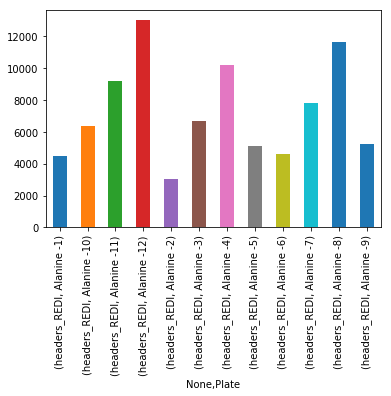

In [71]:
FWD_REV_REDI_87371[['Plate', 'headers_REDI']].groupby('Plate').count().unstack(0).plot.bar()

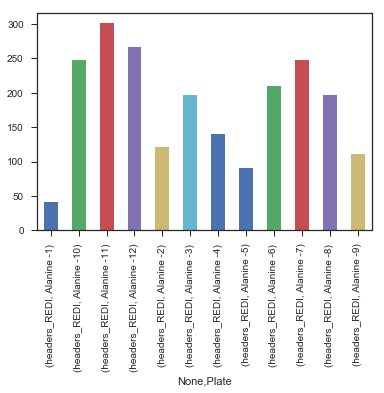

In [411]:
FWD_REV_REDI_2167[['Plate', 'headers_REDI']].groupby('Plate').count().unstack(0).plot.bar()

In [328]:
#import seaborn
#seaborn.set(style='ticks')
#fg = seaborn.FacetGrid(data=FWD_REV_REDI[['Plate', 'read_id', 'headers_REDI']], hue='headers_REDI', aspect=1.61)

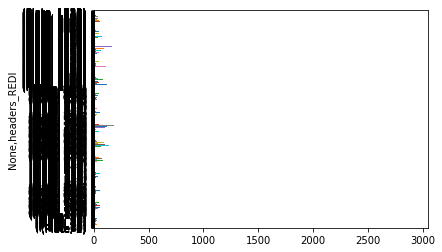

In [73]:
FWD_REV_REDI_87371[['Plate', 'headers_REDI']].groupby('headers_REDI').count().unstack().plot.barh()


In [ ]:
FWD_REV_REDI_87371[FWD_REV_REDI_87371['AS_REDI']>=-8]

#### Getting Gene Alignment 

In [9]:
GENE_HITS = sam2DFWithBED('genes1/accepted_hits.sam', 'genes1/accepted_hits.bed','bowtie','genes_87371_hits')

## Ensuring REDI BC is before REV BC

In [8]:
#newer changes -------------------------------------------------------------------------------------------

In [ ]:
FWD_REV_REDI_87371_startpos = pd.read_csv('FWD_REV_REDI_87371_Real.csv').drop('Unnamed: 0',1)

In [ ]:
FWD_REV_REDI_87371_startpos['REV_startpos_actual'] = FWD_REV_REDI_87371_startpos.entireRead.str.len()-100 + FWD_REV_REDI_87371_startpos['startpos_REV']
FWD_REV_REDI_87371_startpos['REDI_startpos_actual'] = FWD_REV_REDI_87371_startpos.entireRead.str.len()-400 + FWD_REV_REDI_87371_startpos['startpos_REDI']


In [ ]:
FWD_REV_REDI_87371_startpos['REDI_endpos_actual'] = FWD_REV_REDI_87371_startpos['REDI_startpos_actual'] + 26

In [ ]:
FWD_REV_REDI_75585 = FWD_REV_REDI_87371_startpos[FWD_REV_REDI_87371_startpos['REV_startpos_actual'] > FWD_REV_REDI_87371_startpos['REDI_endpos_actual']]

In [ ]:
FWD_REV_REDI_75585.to_csv('FWD_REV_REDI_75585.csv', header = True)

In [ ]:
#new changes end ----------------------------------------------------------------------------------------

In [8]:
FWD_REV_REDI_87371 = pd.read_csv('FWD_REV_REDI_87371_Real.csv').drop('Unnamed: 0',1)

In [10]:
gene_hits_ints = []
for i in GENE_HITS['read_id']:
    j = int(i)
    gene_hits_ints.append(j)
GENE_HITS['read_id']=gene_hits_ints

In [11]:
FWD_REV_REDI_GENES_18280 = pd.merge(FWD_REV_REDI_87371, GENE_HITS, how = 'inner', on = ['read_id'])
FWD_REV_REDI_GENES_18280.columns.values[26:31] = ['headers_GENES', 'startpos_GENES', 'seq_GENES', 'alignment_score_GENES', 'AS_GENES']





In [13]:
x = readFastQ('KU42_Sequences_ShortHeader.fastq')


# Graphing Plate Barcodes

In [12]:
FWD_REV_REDI_GENES_18280.to_csv('FWD_REV_REDI_GENES_18280.csv', header = True)

In [13]:
FWD_REV_REDI_GENES_18280['Plate'].value_counts()
plateList = pd.unique(FWD_REV_REDI_GENES_18280['Plate']).tolist()
list.sort(plateList)

In [14]:
PLATE1 = FWD_REV_REDI_GENES_18280[FWD_REV_REDI_GENES_18280['Plate']==plateList[0]]
PLATE10 = FWD_REV_REDI_GENES_18280[FWD_REV_REDI_GENES_18280['Plate']==plateList[1]]
PLATE11 = FWD_REV_REDI_GENES_18280[FWD_REV_REDI_GENES_18280['Plate']==plateList[2]]
PLATE12 = FWD_REV_REDI_GENES_18280[FWD_REV_REDI_GENES_18280['Plate']==plateList[3]]
PLATE2 = FWD_REV_REDI_GENES_18280[FWD_REV_REDI_GENES_18280['Plate']==plateList[4]]
PLATE3 = FWD_REV_REDI_GENES_18280[FWD_REV_REDI_GENES_18280['Plate']==plateList[5]]
PLATE4 = FWD_REV_REDI_GENES_18280[FWD_REV_REDI_GENES_18280['Plate']==plateList[6]]
PLATE5 = FWD_REV_REDI_GENES_18280[FWD_REV_REDI_GENES_18280['Plate']==plateList[7]]
PLATE6 = FWD_REV_REDI_GENES_18280[FWD_REV_REDI_GENES_18280['Plate']==plateList[8]]
PLATE7 = FWD_REV_REDI_GENES_18280[FWD_REV_REDI_GENES_18280['Plate']==plateList[9]]
PLATE8 = FWD_REV_REDI_GENES_18280[FWD_REV_REDI_GENES_18280['Plate']==plateList[10]]
PLATE9 = FWD_REV_REDI_GENES_18280[FWD_REV_REDI_GENES_18280['Plate']==plateList[11]]

In [126]:
PLATE1_count = PLATE1[['Plate', 'headers_REDI']].groupby(['headers_REDI']).count() #402 is length
PLATE_1_threshold = int(np.percentile(PLATE1_count['Plate'],95))
PLATE1_GRAPH = PLATE1_count[PLATE1_count['Plate']>PLATE_1_threshold]
#PLATE1_GRAPH.plot.bar()

PLATE2_count = PLATE2[['Plate', 'headers_REDI']].groupby(['headers_REDI']).count() #402 is length
PLATE_2_threshold = int(np.percentile(PLATE2_count['Plate'],95))
PLATE2_GRAPH = PLATE2_count[PLATE2_count['Plate']>PLATE_2_threshold]
#PLATE2_GRAPH.plot.bar()

PLATE3_count = PLATE3[['Plate', 'headers_REDI']].groupby(['headers_REDI']).count() #402 is length
PLATE_3_threshold = int(np.percentile(PLATE3_count['Plate'],95))
PLATE3_GRAPH = PLATE3_count[PLATE3_count['Plate']>PLATE_3_threshold]
#PLATE3_GRAPH.plot.bar()

PLATE4_count = PLATE4[['Plate', 'headers_REDI']].groupby(['headers_REDI']).count() #402 is length
PLATE_4_threshold = int(np.percentile(PLATE4_count['Plate'],95))
PLATE4_GRAPH = PLATE4_count[PLATE4_count['Plate']>PLATE_4_threshold]
#PLATE4_GRAPH.plot.bar()

PLATE5_count = PLATE5[['Plate', 'headers_REDI']].groupby(['headers_REDI']).count() #402 is length
PLATE_5_threshold = int(np.percentile(PLATE5_count['Plate'],95))
PLATE5_GRAPH = PLATE5_count[PLATE5_count['Plate']>PLATE_5_threshold]
#PLATE5_GRAPH.plot.bar()

PLATE6_count = PLATE6[['Plate', 'headers_REDI']].groupby(['headers_REDI']).count() #402 is length
PLATE_6_threshold = int(np.percentile(PLATE6_count['Plate'],95))
PLATE6_GRAPH = PLATE6_count[PLATE6_count['Plate']>PLATE_6_threshold]
#PLATE6_GRAPH.plot.bar()

PLATE7_count = PLATE7[['Plate', 'headers_REDI']].groupby(['headers_REDI']).count() #402 is length
PLATE_7_threshold = int(np.percentile(PLATE7_count['Plate'],95))
PLATE7_GRAPH = PLATE7_count[PLATE7_count['Plate']>PLATE_7_threshold]
#PLATE7_GRAPH.plot.bar()

PLATE8_count = PLATE8[['Plate', 'headers_REDI']].groupby(['headers_REDI']).count() #402 is length
PLATE_8_threshold = int(np.percentile(PLATE8_count['Plate'],95))
PLATE8_GRAPH = PLATE8_count[PLATE8_count['Plate']>PLATE_8_threshold]
#PLATE8_GRAPH.plot.bar()

PLATE9_count = PLATE9[['Plate', 'headers_REDI']].groupby(['headers_REDI']).count() #402 is length
PLATE_9_threshold = int(np.percentile(PLATE9_count['Plate'],95))
PLATE9_GRAPH = PLATE9_count[PLATE9_count['Plate']>PLATE_9_threshold]
#PLATE9_GRAPH.plot.bar()

PLATE10_count = PLATE10[['Plate', 'headers_REDI']].groupby(['headers_REDI']).count() #402 is length
PLATE_10_threshold = int(np.percentile(PLATE10_count['Plate'],95))
PLATE10_GRAPH = PLATE10_count[PLATE10_count['Plate']>PLATE_10_threshold]
#PLATE10_GRAPH.plot.bar()

PLATE11_count = PLATE11[['Plate', 'headers_REDI']].groupby(['headers_REDI']).count() #402 is length
PLATE_11_threshold = int(np.percentile(PLATE11_count['Plate'],95))
PLATE11_GRAPH = PLATE11_count[PLATE11_count['Plate']>PLATE_11_threshold]
#PLATE11_GRAPH.plot.bar()

PLATE12_count = PLATE12[['Plate', 'headers_REDI']].groupby(['headers_REDI']).count() #402 is length
PLATE_12_threshold = int(np.percentile(PLATE12_count['Plate'],95))
PLATE12_GRAPH = PLATE12_count[PLATE12_count['Plate']>PLATE_12_threshold]
#PLATE12_GRAPH.plot.bar()


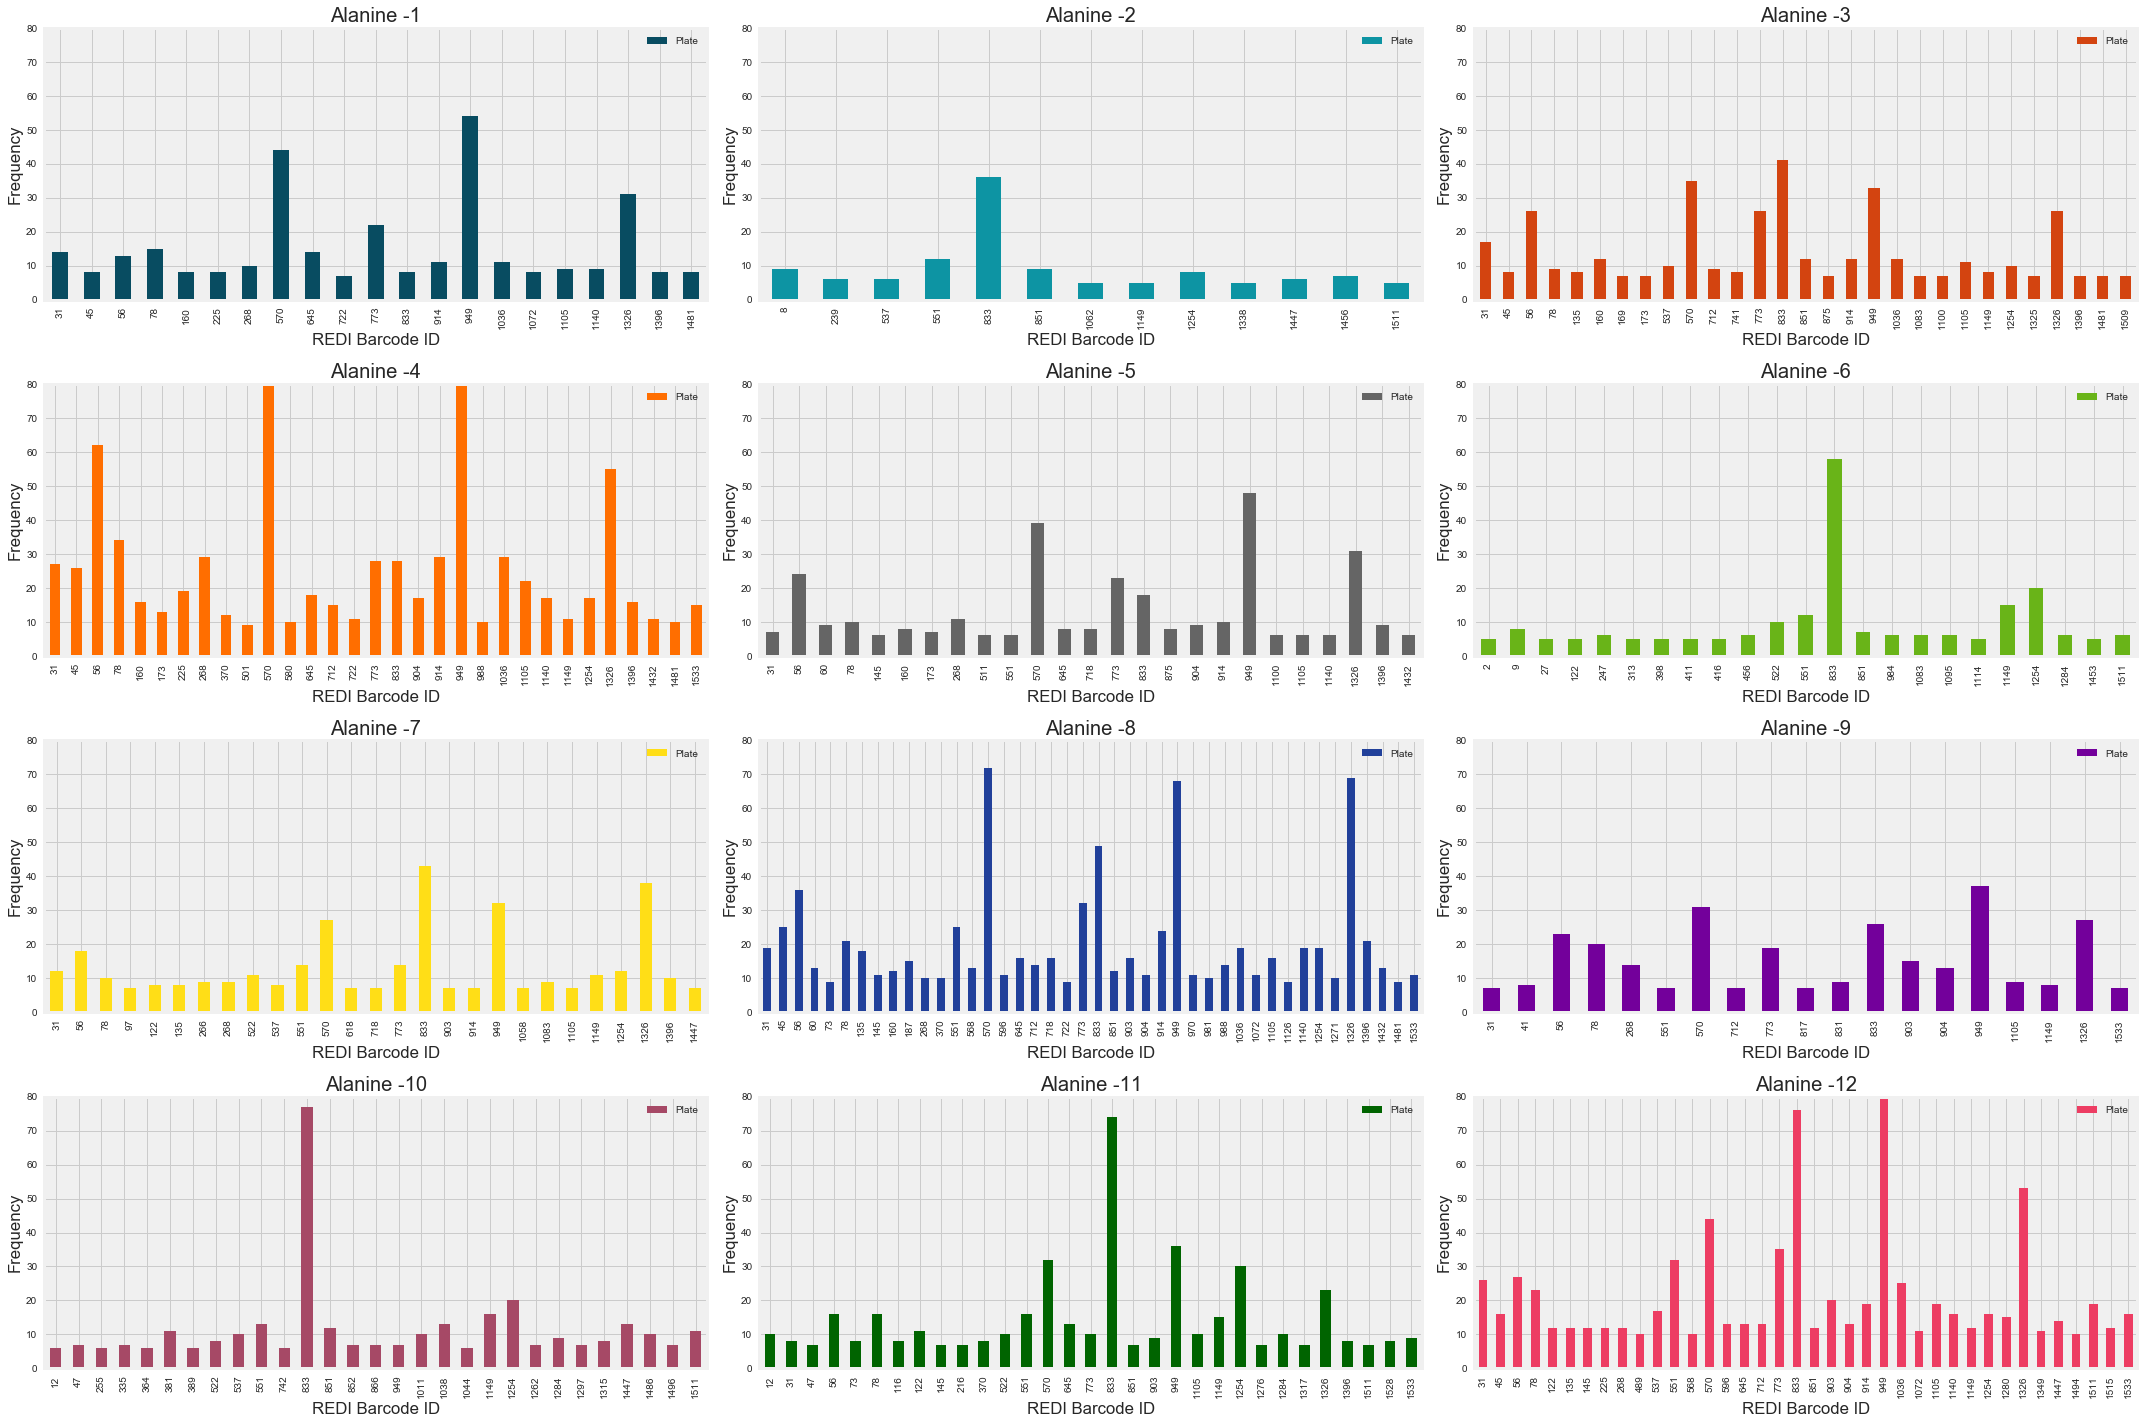

In [174]:
fig = plt.figure(figsize = (30,20))
plt.style.use('fivethirtyeight')
ylim_num = 80

ax1 = fig.add_subplot(431)
PLATE1_GRAPH.plot(kind = 'bar', ax = ax1, title = PLATE1['Plate'].tolist()[0], color='#084c61')
ax1.set(xlabel='REDI Barcode ID', ylabel='Frequency', ylim=(0,ylim_num))


ax2 = fig.add_subplot(432)
PLATE2_GRAPH.plot(kind = 'bar', ax = ax2, title = PLATE2['Plate'].tolist()[0], color='#0d94a3')
ax2.set(xlabel='REDI Barcode ID', ylabel='Frequency', ylim=(0,ylim_num))

ax3 = fig.add_subplot(433)
PLATE3_GRAPH.plot(kind = 'bar', ax = ax3, title = PLATE3['Plate'].tolist()[0], color='#d34410')
ax3.set(xlabel='REDI Barcode ID', ylabel='Frequency', ylim=(0,ylim_num))

ax4 = fig.add_subplot(434)
PLATE4_GRAPH.plot(kind = 'bar', ax = ax4, title = PLATE4['Plate'].tolist()[0], color='#ff6e00')
ax4.set(xlabel='REDI Barcode ID', ylabel='Frequency', ylim=(0,ylim_num))

ax5 = fig.add_subplot(435)
PLATE5_GRAPH.plot(kind = 'bar', ax = ax5, title = PLATE5['Plate'].tolist()[0], color='#656565')
ax5.set(xlabel='REDI Barcode ID', ylabel='Frequency', ylim=(0,ylim_num))

ax6 = fig.add_subplot(436)
PLATE6_GRAPH.plot(kind = 'bar', ax = ax6, title = PLATE6['Plate'].tolist()[0], color='#69b418')
ax6.set(xlabel='REDI Barcode ID', ylabel='Frequency', ylim=(0,ylim_num))

ax7 = fig.add_subplot(437)
PLATE7_GRAPH.plot(kind = 'bar', ax = ax7, title = PLATE7['Plate'].tolist()[0], color='#ffde17')
ax7.set(xlabel='REDI Barcode ID', ylabel='Frequency', ylim=(0,ylim_num))

ax8 = fig.add_subplot(438)
PLATE8_GRAPH.plot(kind = 'bar', ax = ax8, title = PLATE8['Plate'].tolist()[0], color='#21409a')
ax8.set(xlabel='REDI Barcode ID', ylabel='Frequency', ylim=(0,ylim_num))

ax9 = fig.add_subplot(439)
PLATE9_GRAPH.plot(kind = 'bar', ax = ax9, title = PLATE9['Plate'].tolist()[0], color='#73009b')
ax9.set(xlabel='REDI Barcode ID', ylabel='Frequency', ylim=(0,ylim_num))

ax10 = fig.add_subplot(4,3,10)
PLATE10_GRAPH.plot(kind = 'bar', ax = ax10, title = PLATE10['Plate'].tolist()[0], color='#a64966')
ax10.set(xlabel='REDI Barcode ID', ylabel='Frequency', ylim=(0,ylim_num))

ax11 = fig.add_subplot(4,3,11)
PLATE11_GRAPH.plot(kind = 'bar', ax = ax11, title = PLATE11['Plate'].tolist()[0], color='darkgreen')
ax11.set(xlabel='REDI Barcode ID', ylabel='Frequency', ylim=(0,ylim_num))

ax12 = fig.add_subplot(4,3,12)
PLATE12_GRAPH.plot(kind = 'bar', ax = ax12, title = PLATE12['Plate'].tolist()[0], color='#ed3d63')
ax12.set(xlabel='REDI Barcode ID', ylabel='Frequency', ylim=(0,ylim_num))

plt.tight_layout()
plt.show()
#plt.savefig('plate_barcode_bin_plot.pdf',format='pdf')

# Merging Gene 18000 with 75000 FWD_REV_REDI after ensuring REDI BC is before REV BC

In [ ]:
FWD_REV_REDI_GENES_18280 = pd.read_csv('FWD_REV_REDI_GENES_18280.csv').drop('Unnamed: 0',1)
FWD_REV_REDI_75585_startposChange = pd.read_csv('FWD_REV_REDI_75585_startposChange.csv').drop('Unnamed: 0',1)

In [ ]:
#FWD_REV_REDI_75585_startposChange['test_file']='in 75k'
readIDLIST = FWD_REV_REDI_75585_startposChange['read_id'].tolist()

In [ ]:
FWD_REV_REDI_GENES_18280[FWD_REV_REDI_GENES_18280['read_id'].isin(readIDLIST)]

In [ ]:
mergedDF = pd.merge(FWD_REV_REDI_GENES_18280, FWD_REV_REDI_75585_startposChange, on=['read_id'], how='inner')

In [ ]:
mergedDF.shape, FWD_REV_REDI_GENES_18280.shape

In [ ]:
mergedDF_dropNA = mergedDF.dropna(0,how='any')

In [ ]:
mergedDF_dropNA_changed = mergedDF_dropNA[mergedDF_dropNA['REDI_endpos_actual'] < mergedDF_dropNA['REV_startpos_actual']]

In [ ]:
mergedDF_dropNA_changed.to_csv('mergedDF_dropNA_changed.csv', header=True)

In [ ]:
mergedDF_dropNA_changed[mergedDF_dropNA_changed['barcodeNum_REDI_x'] == 48].transpose()

In [ ]:
mergedDF_dropNA[mergedDF_dropNA['']]

In [ ]:
mergedDF['test_file'].value_counts()